In [9]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
#from helper_dataset import get_dataloaders
#import helper
from torch.utils.data import SubsetRandomSampler
import random

In [10]:
RANDOM_SEED = 123
set_all_seeds(RANDOM_SEED)
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
NUM_EPOCHS = 10

In [11]:
numbersList = []
for i in range(0, 744):
    numbersList.append(i)
random.shuffle(numbersList)

rng = np.random.RandomState(123)
indices = np.arange(744)
rng.shuffle(indices)
num = int(.15 * 744)

firstInterval = 744-num
secondInterval = firstInterval + int(.05 * 744)
train_indices = indices[:firstInterval]
valid_indices = indices[firstInterval:secondInterval]
test_indices = indices[secondInterval:]

In [12]:
data_dir = 'C:/Users/James Thomason/Stat 453/Project/Data'
#data_dir = 'C:\\Users\\sk792\\Downloads\\Star453Project\\Data\\DATA\\'
#Applying Transformation
train_transforms = transforms.Compose([
    # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Grayscale
                                #transforms.Grayscale(), 
                                transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor()#,
                                #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                                ])
test_transforms = transforms.Compose([#transforms.Grayscale(), 
                                      transforms.Resize(64),
                                      transforms.CenterCrop(64),
                                      transforms.ToTensor()#,
                                      #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                                        ])
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)                                       
test_data = datasets.ImageFolder(data_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(data_dir, transform=test_transforms) 


train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(valid_indices)
test_sampler = SubsetRandomSampler(test_indices)

#Data Loading
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, sampler=train_sampler)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, sampler=test_sampler)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, sampler=valid_sampler)

# Checking the dataset (images)
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:])
    break

Image batch dimensions: torch.Size([64, 3, 64, 64])
Image label dimensions: torch.Size([64])
Class labels of 10 examples: tensor([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1])


In [13]:
count = 0
countSum = 0
for images, labels in test_loader:  
    count += labels.shape[0]
    countSum += sum(labels)
countSum/count

tensor(0.5405)

Epoch: 001/010 | Batch 0000/0020 | Loss: 0.6949
Epoch: 001/010 | Train: 45.97% | Validation: 59.46%
Time elapsed: 0.15 min
Epoch: 002/010 | Batch 0000/0020 | Loss: 0.7586
Epoch: 002/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.28 min
Epoch: 003/010 | Batch 0000/0020 | Loss: 0.6445
Epoch: 003/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.40 min
Epoch: 004/010 | Batch 0000/0020 | Loss: 0.8192
Epoch: 004/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.52 min
Epoch: 005/010 | Batch 0000/0020 | Loss: 0.7703
Epoch: 005/010 | Train: 45.97% | Validation: 59.46%
Time elapsed: 0.65 min
Epoch: 006/010 | Batch 0000/0020 | Loss: 0.7112
Epoch: 006/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.77 min
Epoch: 007/010 | Batch 0000/0020 | Loss: 0.6664
Epoch: 007/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.90 min
Epoch: 008/010 | Batch 0000/0020 | Loss: 1.1467
Epoch: 008/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 1.02 min
Epoch: 009/010 |

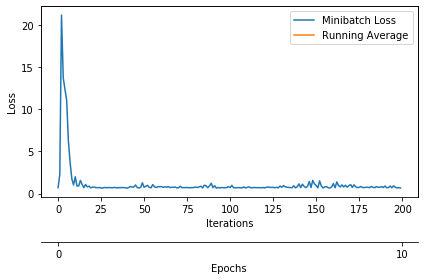

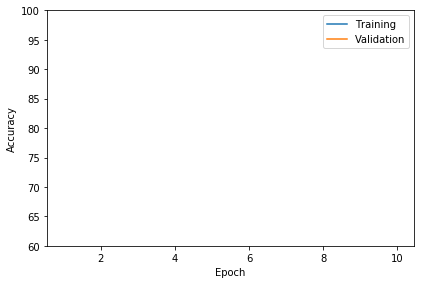

In [6]:

class AlexNet(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()
        self.features = torch.nn.Sequential(
            torch.nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(64, 192, kernel_size=5, padding=2),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
            torch.nn.Conv2d(192, 384, kernel_size=3, padding=1),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.Conv2d(384, 256, kernel_size=3, padding=1),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.Conv2d(256, 256, kernel_size=3, padding=1),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = torch.nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = torch.nn.Sequential(
            torch.nn.Dropout(0.5),
            torch.nn.Linear(256 * 6 * 6, 4096),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(4096, 4096),
            #torch.nn.ReLU(inplace=True),
            torch.nn.Tanh(),
            torch.nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        logits = self.classifier(x)
        return logits
    
model = AlexNet(num_classes=2)

model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

Epoch: 001/010 | Batch 0000/0010 | Loss: 0.6947
Epoch: 001/010 | Train: 49.92% | Validation: 64.86%
Time elapsed: 0.36 min
Epoch: 002/010 | Batch 0000/0010 | Loss: 0.6881
Epoch: 002/010 | Train: 54.03% | Validation: 40.54%
Time elapsed: 0.47 min
Epoch: 003/010 | Batch 0000/0010 | Loss: 0.6735
Epoch: 003/010 | Train: 64.30% | Validation: 67.57%
Time elapsed: 0.57 min
Epoch: 004/010 | Batch 0000/0010 | Loss: 0.6671
Epoch: 004/010 | Train: 52.45% | Validation: 62.16%
Time elapsed: 0.69 min
Epoch: 005/010 | Batch 0000/0010 | Loss: 0.6512
Epoch: 005/010 | Train: 64.77% | Validation: 54.05%
Time elapsed: 0.80 min
Epoch: 006/010 | Batch 0000/0010 | Loss: 0.6564
Epoch: 006/010 | Train: 66.19% | Validation: 56.76%
Time elapsed: 0.93 min
Epoch: 007/010 | Batch 0000/0010 | Loss: 0.6260
Epoch: 007/010 | Train: 70.62% | Validation: 70.27%
Time elapsed: 1.04 min
Epoch: 008/010 | Batch 0000/0010 | Loss: 0.6029
Epoch: 008/010 | Train: 72.99% | Validation: 75.68%
Time elapsed: 1.16 min
Epoch: 009/010 |

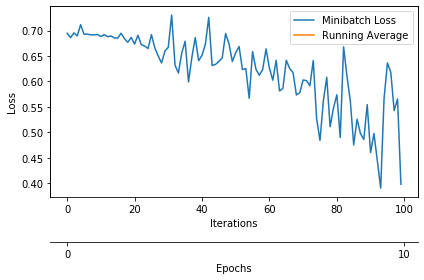

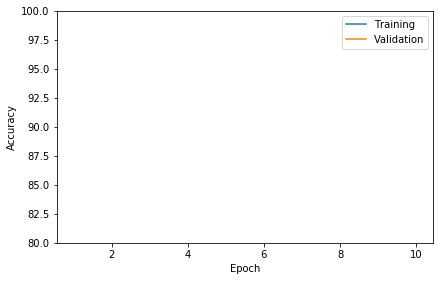

In [16]:
class LeNet5(torch.nn.Module):

    def __init__(self, num_classes, grayscale=False):
        super().__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes


        self.features = torch.nn.Sequential(
            
            torch.nn.Conv2d(3, 6, kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Conv2d(6, 16, kernel_size=5),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(16*13*13, 120),
            torch.nn.ReLU(),
            torch.nn.Linear(120, 84),
            torch.nn.ReLU(),
            torch.nn.Linear(84, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        return logits
model = LeNet5(grayscale=True,
               num_classes=2)

model = model.to(DEVICE)

#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=100)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()

In [23]:
from torchsummary import summary
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 60, 60]             456
              ReLU-2            [-1, 6, 60, 60]               0
         MaxPool2d-3            [-1, 6, 30, 30]               0
            Conv2d-4           [-1, 16, 26, 26]           2,416
              ReLU-5           [-1, 16, 26, 26]               0
         MaxPool2d-6           [-1, 16, 13, 13]               0
            Linear-7                  [-1, 120]         324,600
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                    [-1, 2]             170
Total params: 337,806
Trainable params: 337,806
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/

In [15]:
class ConvNet(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.layers = torch.nn.Sequential(
                torch.nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
                torch.nn.BatchNorm2d(32),
                torch.nn.LeakyReLU(0.1, inplace=True),
                #
                torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                torch.nn.BatchNorm2d(64),
                torch.nn.LeakyReLU(0.1, inplace=True),
                #
                #torch.nn.Flatten(),
                torch.nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
                torch.nn.BatchNorm2d(64),
                torch.nn.LeakyReLU(0.1, inplace=True),
                #
                #torch.nn.Flatten(),
                torch.nn.Linear(4096, 16),
                torch.nn.BatchNorm1d(16),
                torch.nn.LeakyReLU(0.1, inplace=True),
                torch.nn.Dropout(0.5),
                #
                torch.nn.Linear(128, num_classes),
                )

    def forward(self, x):
        logits = self.layers(x)
        #probas = torch.softmax(logits, dim=1)
        return logits
    
model = ConvNet(num_classes=2)

model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=100)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=200)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

RuntimeError: mat1 dim 1 must match mat2 dim 0